In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
base_dir = "drive/MyDrive/IST707/Project/"
target_dir = base_dir + "ASL_Dataset"

dF_file = "procesed_data_w_imgdata.csv"
dataset_path = base_dir + dF_file

In [4]:
df = pd.read_csv(base_dir + "procesed_imgdata_32x32.csv")

<ipython-input-4-c9cf85d25ea8>:1: DtypeWarning: Columns (1024) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(base_dir + "procesed_imgdata_32x32.csv")


In [5]:
df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,labels,isSign,labelsEnc
0,0.478431,0.435294,0.462745,0.537255,0.631373,0.670588,0.654902,0.639216,0.619608,0.592157,...,0.419608,0.400000,0.407843,0.403922,0.403922,0.400000,0.392157,u,1,33
1,0.474510,0.439216,0.447059,0.533333,0.627451,0.670588,0.654902,0.639216,0.627451,0.596078,...,0.407843,0.415686,0.415686,0.411765,0.403922,0.403922,0.407843,u,1,33
2,0.474510,0.427451,0.396078,0.356863,0.321569,0.290196,0.262745,0.247059,0.231373,0.215686,...,0.211765,0.180392,0.172549,0.168627,0.156863,0.274510,0.568627,u,1,33
3,0.466667,0.411765,0.384314,0.341176,0.298039,0.203922,0.152941,0.231373,0.223529,0.203922,...,0.568627,0.576471,0.576471,0.576471,0.572549,0.580392,0.588235,u,1,33
4,0.454902,0.407843,0.388235,0.341176,0.309804,0.282353,0.254902,0.243137,0.219608,0.207843,...,0.537255,0.552941,0.556863,0.549020,0.545098,0.549020,0.556863,u,1,33


In [6]:
X = df.iloc[:, :-3].copy()
y = df["labelsEnc"]

In [7]:
X.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023
0,0.478431,0.435294,0.462745,0.537255,0.631373,0.670588,0.654902,0.639216,0.619608,0.592157,...,0.439216,0.392157,0.435294,0.419608,0.400000,0.407843,0.403922,0.403922,0.400000,0.392157
1,0.474510,0.439216,0.447059,0.533333,0.627451,0.670588,0.654902,0.639216,0.627451,0.596078,...,0.411765,0.415686,0.411765,0.407843,0.415686,0.415686,0.411765,0.403922,0.403922,0.407843
2,0.474510,0.427451,0.396078,0.356863,0.321569,0.290196,0.262745,0.247059,0.231373,0.215686,...,0.529412,0.282353,0.227451,0.211765,0.180392,0.172549,0.168627,0.156863,0.274510,0.568627
3,0.466667,0.411765,0.384314,0.341176,0.298039,0.203922,0.152941,0.231373,0.223529,0.203922,...,0.537255,0.541176,0.556863,0.568627,0.576471,0.576471,0.576471,0.572549,0.580392,0.588235
4,0.454902,0.407843,0.388235,0.341176,0.309804,0.282353,0.254902,0.243137,0.219608,0.207843,...,0.133333,0.168627,0.525490,0.537255,0.552941,0.556863,0.549020,0.545098,0.549020,0.556863


In [8]:
X = np.reshape(X.values, (-1, 32, 32, 1))

In [9]:
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

In [10]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(39, activation='softmax')
])

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        160       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3600)              0         
                                                                 
 dense (Dense)               (None, 64)                230464    
                                                                 
 dense_1 (Dense)             (None, 39)                2

In [13]:
epochs = 25
history = model.fit(train_data, train_labels, batch_size=32, epochs=epochs, validation_data=(val_data, val_labels))

Epoch 1/25
1225/1225 [==============================] - 15s 4ms/step - loss: 0.5404 - accuracy: 0.8442 - val_loss: 0.1622 - val_accuracy: 0.9440
Epoch 2/25
1225/1225 [==============================] - 6s 5ms/step - loss: 0.0989 - accuracy: 0.9679 - val_loss: 0.2085 - val_accuracy: 0.9308
Epoch 3/25
1225/1225 [==============================] - 6s 5ms/step - loss: 0.0631 - accuracy: 0.9800 - val_loss: 0.1400 - val_accuracy: 0.9588
Epoch 4/25
1225/1225 [==============================] - 5s 4ms/step - loss: 0.0489 - accuracy: 0.9840 - val_loss: 0.0714 - val_accuracy: 0.9798
Epoch 5/25
1225/1225 [==============================] - 7s 5ms/step - loss: 0.0379 - accuracy: 0.9880 - val_loss: 0.5977 - val_accuracy: 0.8566
Epoch 6/25
1225/1225 [==============================] - 5s 4ms/step - loss: 0.0299 - accuracy: 0.9909 - val_loss: 0.0773 - val_accuracy: 0.9784
Epoch 7/25
1225/1225 [==============================] - 6s 5ms/step - loss: 0.0260 - accuracy: 0.9918 - val_loss: 0.1678 - val_accuracy

In [14]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)

383/383 [==============================] - 1s 3ms/step - loss: 0.1191 - accuracy: 0.9826
Test accuracy: 0.9826065897941589


In [15]:
model.save(base_dir + 'Models/cnn_1conv_e25_v1.h5')

In [16]:
first = True # First training values
if first:
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
else:
  acc = acc + history.history['accuracy']
  val_acc = val_acc + history.history['val_accuracy']
  loss = loss + history.history['loss']
  val_loss = val_loss + history.history['val_loss']

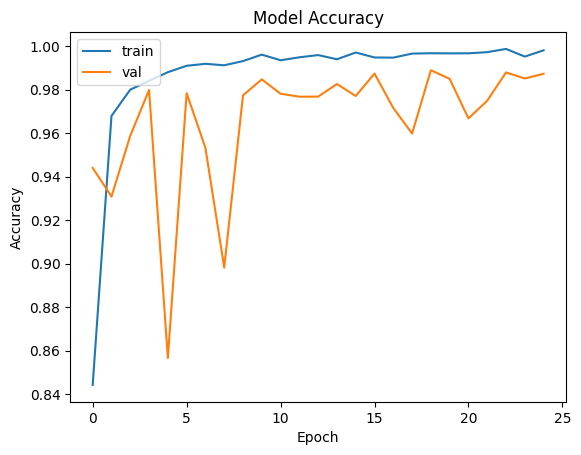

In [17]:
plt.plot(acc)
plt.plot(val_acc)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

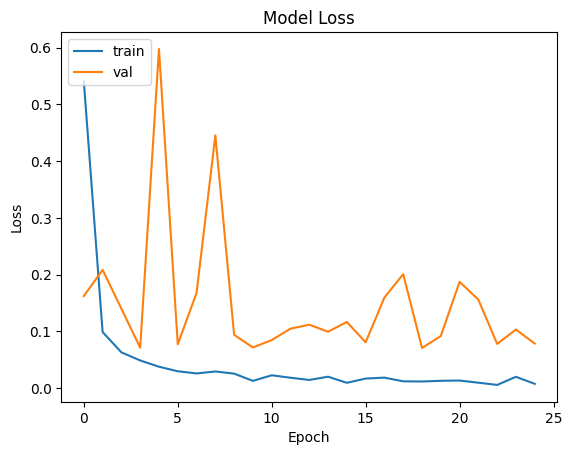

In [18]:
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model Loss')
plt.ylabel('Loss')  
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [19]:
predictions = model.predict(test_data)

383/383 [==============================] - 1s 2ms/step


In [20]:
y_pred = np.argmax(predictions, axis=1)

In [21]:
print('Predicted labels:', y_pred[:10])

Predicted labels: [ 2 18 10  0 34 30 16  6  5 32]


In [22]:
cm = tf.math.confusion_matrix(test_labels, y_pred)
print('Confusion matrix:\n', cm)

Confusion matrix:
 tf.Tensor(
[[310   0   0 ...   0   0   0]
 [  0 305   0 ...   0   0   0]
 [  0   0 314 ...   0   0   0]
 ...
 [  0   0   0 ... 297   0   0]
 [  0   0   0 ...   0 281   0]
 [  0   0   0 ...   0   0 322]], shape=(39, 39), dtype=int32)


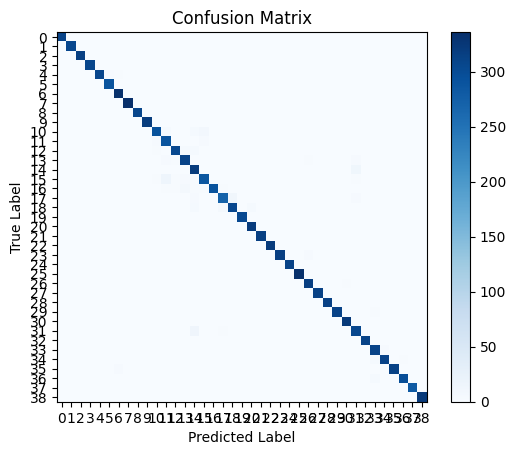

In [24]:
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(39))
plt.yticks(np.arange(39))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [25]:
from sklearn.metrics import classification_report
print('Classification report:\n', classification_report(test_labels, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       310
           1       1.00      1.00      1.00       306
           2       1.00      1.00      1.00       315
           3       1.00      1.00      1.00       306
           4       1.00      0.98      0.99       311
           5       0.99      1.00      0.99       290
           6       0.99      1.00      0.99       334
           7       1.00      1.00      1.00       336
           8       1.00      1.00      1.00       307
           9       1.00      1.00      1.00       318
          10       0.97      0.94      0.96       311
          11       0.92      0.98      0.95       296
          12       0.97      0.95      0.96       319
          13       0.95      0.96      0.96       324
          14       0.90      0.96      0.93       333
          15       0.95      0.90      0.93       316
          16       0.99      0.94      0.97       308
   

In [26]:
import json
with open(base_dir + 'index_labels.json', 'r') as f:
    data_dict = json.load(f)

In [27]:
data_dict

{'0': '0',
 '1': '1',
 '2': '2',
 '3': '3',
 '4': '4',
 '5': '5',
 '6': '6',
 '7': '7',
 '8': '8',
 '9': '9',
 '10': 'a',
 '11': 'b',
 '12': 'c',
 '13': 'd',
 '14': 'del',
 '15': 'e',
 '16': 'f',
 '17': 'g',
 '18': 'h',
 '19': 'i',
 '20': 'j',
 '21': 'k',
 '22': 'l',
 '23': 'm',
 '24': 'n',
 '25': 'nothing',
 '26': 'o',
 '27': 'p',
 '28': 'q',
 '29': 'r',
 '30': 's',
 '31': 'space',
 '32': 't',
 '33': 'u',
 '34': 'v',
 '35': 'w',
 '36': 'x',
 '37': 'y',
 '38': 'z'}

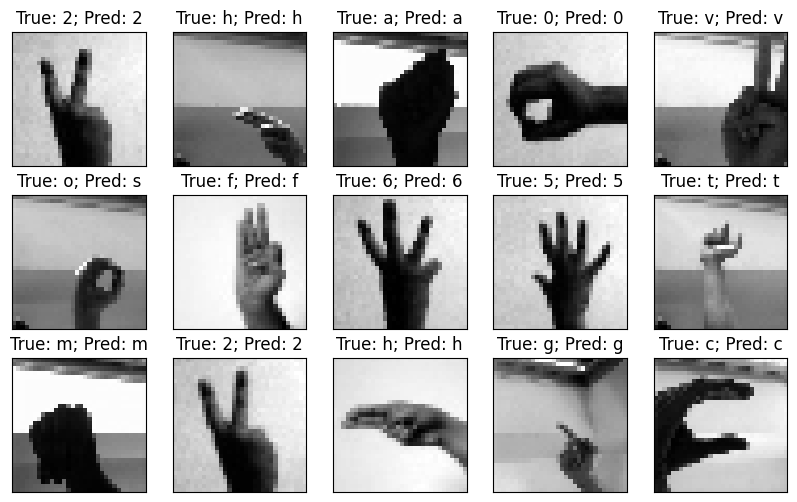

In [28]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(10, 6), subplot_kw={'xticks': [], 'yticks': []})
true = list(test_labels)
for i, ax in enumerate(axes.flat):
    ax.imshow(test_data[i, :, :, 0], cmap='gray')
    ax.set_title(f'True: {data_dict[str(true[i])]}; Pred: {data_dict[str(np.argmax(predictions[i]))]}')
# plt.show()


In [29]:
data_dict[str(np.argmax(predictions[i]))]

'c'